In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [210]:
df_dummies=pd.read_csv('UFC_dummies.csv')
df_dummies.shape

(4178, 57)

In [211]:
df_dummies.Winner = df_dummies.Winner.str.replace('Red','0')
df_dummies.Winner = df_dummies.Winner.str.replace('Blue','1')
df_dummies.Winner = df_dummies.Winner.str.replace('Draw','2')

In [212]:
df_dummies.Winner = pd.to_numeric(df_dummies.Winner)
df_dummies.Winner.value_counts()

0    2649
1    1461
2      68
Name: Winner, dtype: int64

In [213]:
df_dummies_draw = df_dummies[df_dummies.Winner != 2]
df_dummies_draw.shape

(4110, 57)

In [215]:
df_dummies_draw["B_Height_ratio"] = df_dummies_draw.B_Height_cms / df_dummies_draw.R_Height_cms
df_dummies_draw["B_Reach_ratio"] = df_dummies_draw.B_Reach_cms / df_dummies_draw.R_Reach_cms
df_dummies_draw["B_Weight_ratio"] = df_dummies_draw.B_Weight_lbs / df_dummies_draw.R_Weight_lbs
df_dummies_draw["B_age_ratio"] = df_dummies_draw.B_age / df_dummies_draw.R_age
df_dummies_draw.drop(columns=["B_age","R_age","B_Height_cms","R_Height_cms","B_Reach_cms","R_Reach_cms","B_Weight_lbs","R_Weight_lbs"], axis=1, inplace=True)
df_dummies_draw.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

(4110, 53)

In [216]:
stdz_columns_list = [df_dummies_draw["B_current_lose_streak"],df_dummies_draw["B_age_ratio"],df_dummies_draw["B_current_win_streak"],df_dummies_draw["B_longest_win_streak"],df_dummies_draw["B_losses"],df_dummies_draw["B_total_rounds_fought"],df_dummies_draw["B_total_title_bouts"],df_dummies_draw["B_win_by_Decision_Majority"],df_dummies_draw["B_win_by_Decision_Split"],df_dummies_draw["B_win_by_Decision_Unanimous"],df_dummies_draw["B_win_by_KO/TKO"],df_dummies_draw["B_win_by_Submission"],df_dummies_draw["B_win_by_TKO_Doctor_Stoppage"],df_dummies_draw["B_wins"],df_dummies_draw["B_Height_ratio"],df_dummies_draw["B_Reach_ratio"],df_dummies_draw["B_Weight_ratio"],df_dummies_draw["R_current_lose_streak"],df_dummies_draw["R_current_win_streak"],df_dummies_draw["R_longest_win_streak"],df_dummies_draw["R_losses"],df_dummies_draw["R_total_rounds_fought"],df_dummies_draw["R_total_title_bouts"],df_dummies_draw["R_win_by_Decision_Majority"],df_dummies_draw["R_win_by_Decision_Split"],df_dummies_draw["R_win_by_Decision_Unanimous"],df_dummies_draw["R_win_by_KO/TKO"],df_dummies_draw["R_win_by_Submission"],df_dummies_draw["R_win_by_TKO_Doctor_Stoppage"],df_dummies_draw["R_wins"]]

In [217]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

stdz = pd.DataFrame()
for column in stdz_columns_list:
    stdz[column.name]=[i[0] for i in min_max_scaler.fit_transform(column.values.reshape(-1,1))]

stdz = stdz.reset_index(drop=True)
print(stdz.shape)
stdz.head()

(4110, 30)


,B_current_lose_streak,B_age_ratio,B_current_win_streak,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,...,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins
0,0.0,0.334677,0.333333,0.2500,0.076923,0.120000,0.0000,0.0,0.2,0.0,...,0.142857,0.3375,0.1875,0.0,0.4,0.4,0.181818,0.000000,0.0,0.40
1,0.0,0.388762,0.250000,0.1875,0.461538,0.386667,0.0000,0.0,0.4,0.1,...,0.142857,0.3125,0.1250,0.0,0.2,0.2,0.000000,0.153846,0.0,0.25
2,0.0,0.385622,0.250000,0.5000,0.615385,0.906667,0.0625,0.0,0.0,0.7,...,0.071429,0.4125,0.1250,0.0,0.2,0.3,0.272727,0.461538,0.5,0.70
3,0.0,0.273192,0.333333,0.2500,0.000000,0.120000,0.0000,0.0,0.0,0.2,...,0.142857,0.2500,0.0000,0.0,0.2,0.4,0.090909,0.000000,0.0,0.30
4,0.0,0.557816,0.083333,0.0625,0.076923,0.106667,0.0000,0.0,0.0,0.1,...,0.071429,0.0875,0.0000,0.0,0.0,0.1,0.181818,0.000000,0.0,0.15


In [3]:
[print(i) for i in df_dummies.columns]

Winner
title_bout
B_current_lose_streak
B_current_win_streak
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Height_cms
R_Reach_cms
R_Weight_lbs
B_age
R_age
weight_class_Catch Weight
weight_class_Featherweight
weight_class_Flyweight
weight_class_Heavyweight
weight_class_Light Heavyweight
weight_class_Lightweight
weight_class_Middleweight
weight_class_Welterweight
weight_class_Women's Bantamweight
weight_class_Women's Featherweight
weight_class_Women's Flyweight
weight_class_Women's Strawweight
B_Stance_Orthodox
B_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [219]:
df_dummies_draw = df_dummies_draw.reset_index(drop=True)
stdz = stdz.reset_index(drop=True)

In [220]:
stdz_mrg = df_dummies_draw[['weight_class_Catch Weight','weight_class_Featherweight','weight_class_Flyweight','weight_class_Heavyweight','weight_class_Light Heavyweight','weight_class_Lightweight','weight_class_Middleweight','weight_class_Welterweight',"weight_class_Women's Bantamweight","weight_class_Women's Featherweight","weight_class_Women's Flyweight","weight_class_Women's Strawweight",'B_Stance_Orthodox','B_Stance_Southpaw','B_Stance_Switch','R_Stance_Orthodox','R_Stance_Southpaw','R_Stance_Switch','no_of_rounds_3','no_of_rounds_4','no_of_rounds_5','title_bout','Winner']].merge(stdz, how='inner', left_index=True, right_index=True)
stdz_mrg.head()
stdz_mrg.shape

(4110, 53)

In [229]:
# Backup

stdz_mrg.to_csv('UFC_stdz_mrg.csv', index=False)

In [150]:
max(df_dummies_draw.B_Height_ratio)

1.1690140845070423

In [165]:
print(min(stdz_mrg.B_Height_ratio))
print(max(stdz_mrg.B_Height_ratio))

print(min(stdz_mrg.B_Reach_ratio))
print(max(stdz_mrg.B_Reach_ratio))

print(min(stdz_mrg.B_Weight_ratio))
print(max(stdz_mrg.B_Weight_ratio))

0.0
0.9999999999999996
0.0
1.0
0.0
1.0


# Train / Test split

In [222]:
from sklearn.model_selection import train_test_split

win = stdz_mrg['Winner']
other_variables = stdz_mrg.loc[:, ~stdz_mrg.columns.isin(['Winner'])]
X_train, X_test, y_train, y_test = train_test_split(other_variables, win, test_size=0.2,random_state=42)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(822, 52)
(822,)
(3288, 52)
(3288,)


In [120]:
"""win_draw = stdz_mrg_draw['Winner']
other_variables_draw = stdz_mrg_draw.loc[:, ~stdz_mrg_draw.columns.isin(['Winner'])]
X_train_draw, X_test_draw, y_train_draw, y_test_draw = train_test_split(other_variables_draw, win_draw, test_size=0.2,random_state=42)
print(X_test_draw.shape)
print(y_test_draw.shape)
print(X_train_draw.shape)
print(y_train_draw.shape)"""

(822, 51)
(822,)
(3288, 51)
(3288,)


In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)


print(clf.feature_importances_)
print(confusion_matrix(y_test, y_pred_rf))

[0.         0.01071986 0.         0.         0.00477802 0.
 0.00092963 0.         0.00160496 0.         0.00380137 0.
 0.00100075 0.00314499 0.         0.0048527  0.00805703 0.00081238
 0.         0.         0.00642097 0.02122166 0.00336649 0.23208477
 0.01189606 0.00589327 0.003288   0.00820349 0.02693307 0.00119719
 0.00361783 0.01351251 0.00146051 0.00609571 0.         0.01438734
 0.01906024 0.04541575 0.06849398 0.02303589 0.03114833 0.00455534
 0.15825516 0.06851968 0.01960468 0.00606442 0.07481574 0.0216291
 0.01000178 0.0099303  0.         0.04018903]
[[512   0]
 [310   0]]


[[512   0]
 [310   0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       512
           1       0.00      0.00      0.00       310

   micro avg       0.62      0.62      0.62       822
   macro avg       0.31      0.50      0.38       822
weighted avg       0.39      0.62      0.48       822

0.6228710462287105
[7.61773811e-05 6.59567290e-03 2.48792293e-03 3.95519757e-04
 3.14799130e-03 5.46152552e-04 1.80852705e-03 3.09019455e-03
 9.32904222e-04 0.00000000e+00 3.14229270e-03 7.19280471e-05
 1.93746214e-03 5.97504270e-04 6.55897069e-04 3.78202124e-03
 6.73892176e-03 7.66198568e-04 2.82845879e-03 7.41326634e-05
 2.04843436e-03 2.11700203e-02 5.46702419e-03 2.15368762e-01
 5.88045806e-03 2.80929004e-03 6.62436589e-03 7.67703422e-03
 3.07621890e-02 1.64111708e-03 2.12202390e-03 1.46063343e-02
 6.03666832e-03 5.11928675e-03 1.23567968e-02 9.24628304e-03
 1.38097805e-02 4.66193211e-02 5.78207948e-02 5.23337262e-02
 2.80951031e-02 7.932

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


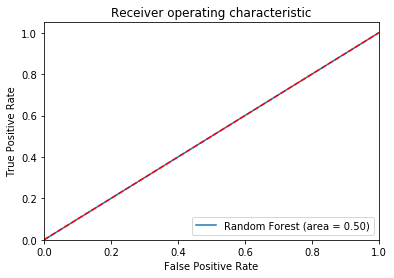

In [224]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


clf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)



print(confusion_matrix(y_test,y_pred_rf))  
print(classification_report(y_test,y_pred_rf))  
print(accuracy_score(y_test, y_pred_rf)) 


print(clf.feature_importances_)
print(confusion_matrix(y_test, y_pred_rf))

logit_roc_auc = roc_auc_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [225]:
from sklearn import metrics
from sklearn import linear_model

In [226]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [228]:
print("Logistic regression Train Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Logistic regression Test Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))

Logistic regression Train Accuracy ::  0.6678832116788321
Logistic regression Test Accuracy ::  0.6326034063260341


In [186]:
y_train.value_counts()

0    2081
1    1153
Name: Winner, dtype: int64

# Demonstration of Unpredictability

In [3]:
df  = pd.read_csv('UFC_stdz_mrg.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
encoder = LabelEncoder()
a = df["Winner"]
x = encoder.fit_transform(a)
#Counter(list(x))
df['Winner'] = list(x)

In [5]:
y = df['Winner']
x = df.drop(['Winner'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2877, 52)
(2877,)
(1233, 52)
(1233,)


In [7]:
clf = RandomForestClassifier(n_estimators=1000,  max_depth=5)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_pred = clf.predict(x_test)

In [10]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5169199694906637

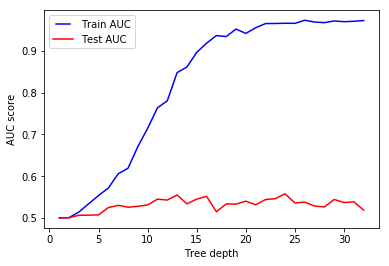

In [12]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

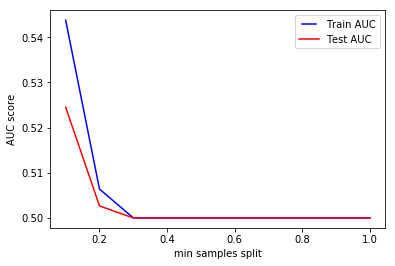

In [13]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

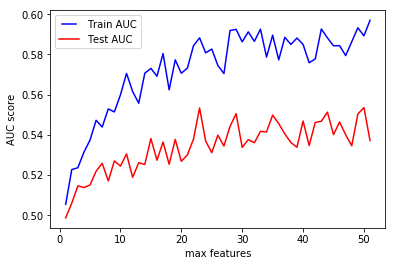

In [14]:
max_features = list(range(1, x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_depth = 5, max_features=max_feature)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

# Let's try with RFE (simplification, only the 10 most important var.)

In [26]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(max_depth=5)
selector = RFE(estimator, 10, step=1)
selector = selector.fit(x_train, y_train)
ls = list(x_train.columns[selector.support_]) 
pd.DataFrame(ls)

,0
0,B_age_ratio
1,B_total_rounds_fought
2,B_Height_ratio
3,B_Reach_ratio
4,B_Weight_ratio
5,R_losses
6,R_total_rounds_fought
7,R_total_title_bouts
8,R_win_by_Decision_Split
9,R_wins


In [17]:
clf = RandomForestClassifier(max_depth=5) 
clf.fit(x_train[ls], y_train) 
clf.score(x_test[ls], y_test)
feature_importances = pd.DataFrame(clf.feature_importances_, index = x_train[ls].columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
B_age_ratio,0.262453
R_losses,0.130256
R_win_by_Decision_Split,0.117006
R_total_rounds_fought,0.098922
B_Reach_ratio,0.096328
B_Weight_ratio,0.072816
B_Height_ratio,0.065249
R_wins,0.064851
R_win_by_KO/TKO,0.053807
R_longest_win_streak,0.038313


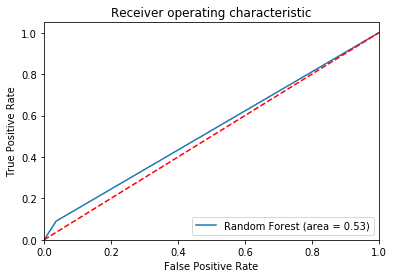

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(x_test[ls])

logit_roc_auc = roc_auc_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Even with a simple method like decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train[ls], y_train)
y_pred_dt = dt.predict(x_test[ls])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5567911522924376

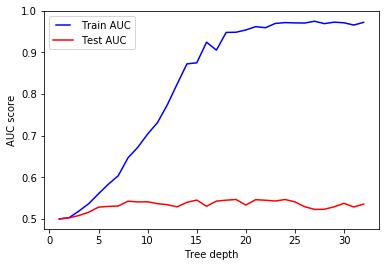

In [23]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

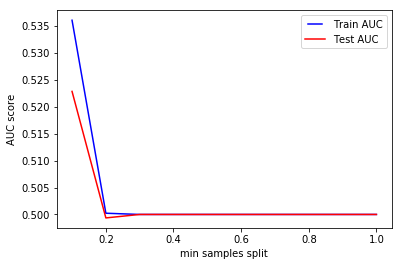

In [24]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

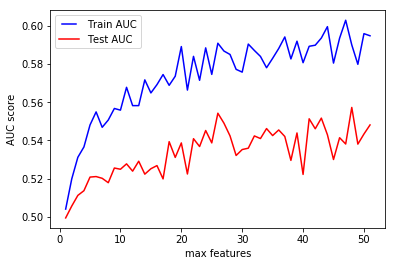

In [25]:
max_features = list(range(1, x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_depth = 5, max_features=max_feature)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()